In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
D = np.random.randn(1000, 500)

In [10]:
hidden_layer_sizes = [500] * 10

In [16]:
non_linearities = ["tanh"] * 10

In [15]:
act = {"relu": lambda x: np.maximum(0, x), "tanh": lambda x: np.tanh(x)}

In [19]:
Hs = {}

In [54]:
for i in range(len(hidden_layer_sizes)):
    if i == 0:
        x = D
    else:
        x = Hs[i-1]
    fan_in = x.shape[-1]
    fan_out = hidden_layer_sizes[i]
    w = np.random.randn(fan_in, fan_out) * 1

    H = np.dot(x, w)
    z = act[non_linearities[i]](H)
    Hs[i] = z

In [55]:
layer_mean = [np.mean(H) for H in Hs.values()]
layer_std = [np.std(H) for H in Hs.values()]

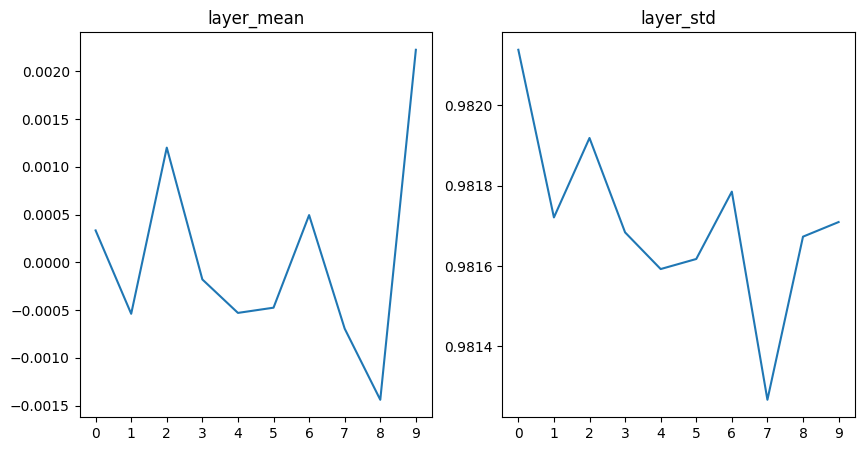

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(layer_mean)
ax[0].set_title("layer_mean")
ax[0].set_xticks(list(range(10)))
ax[1].plot(layer_std)
ax[1].set_title("layer_std")
ax[1].set_xticks(list(range(10)))
plt.show()

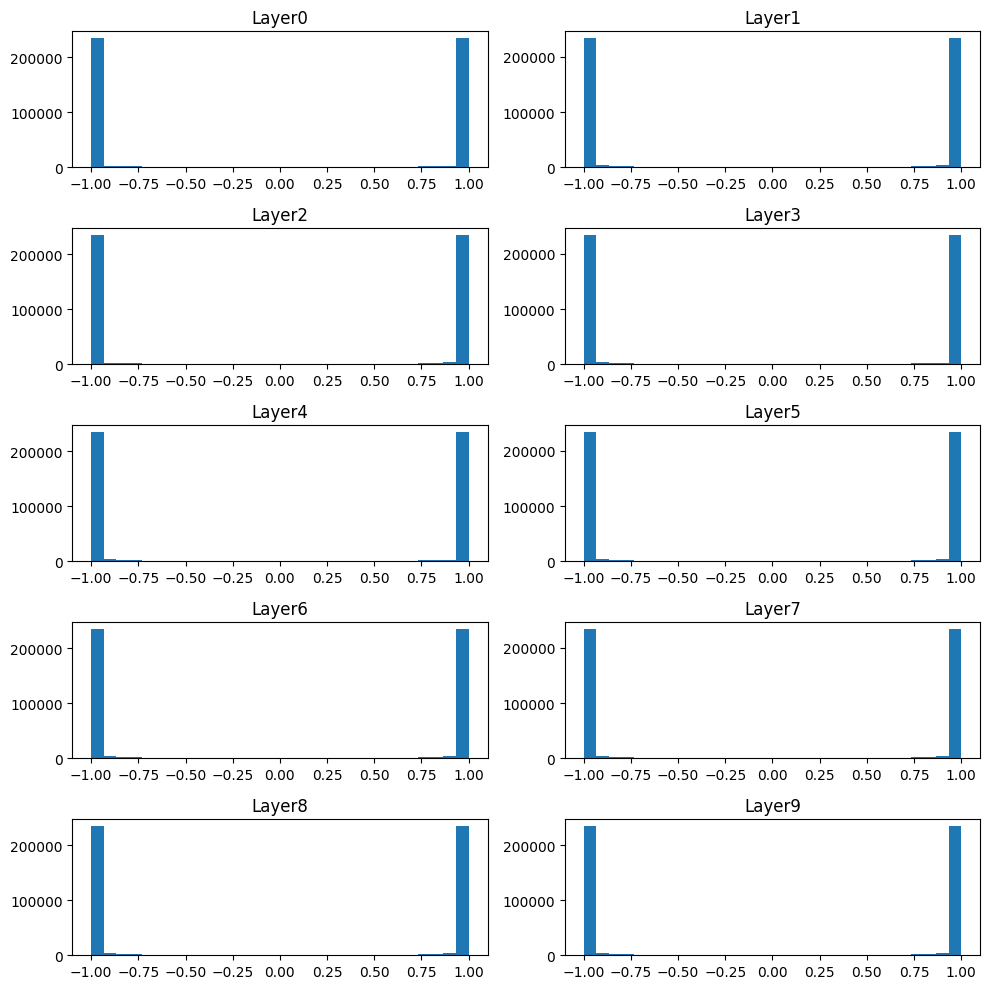

In [57]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
ax = ax.reshape(-1)
for idx, H in enumerate(Hs.values()):
    ax[idx].hist(H.ravel(), 30, range=(-1, 1))
    ax[idx].set_title(f"Layer{idx}")
plt.tight_layout()
plt.show()